In [11]:
#Here you must specify your own path
root = ''

In [12]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

In [13]:
# Dic to get the respective target values of the numbers.
target_dic = {
    0: '(0, 20]constant',
    1: '(20, 40]constant',
    2: '(40, 60]constant',
    3: '(60, 80]constant',
    4: '(80, 100]constant',
    5: '(0, 20]intermittent',
    6: '(20, 40]intermittent',
    7: '(40, 60]intermittent',
    8: '(60, 80]intermittent',
    9: '(80, 100]intermittent',
}

In [14]:
#read in csv file into dataframe
df_train = pd.read_csv(root + 'data/02_processed/completed_train.csv', sep=';')
df_train.pop('Unnamed: 0')

df2=df_train.copy()
df2.drop(['target','4','66'], axis = 1,inplace=True)


#read validation and test data from csv
df_validation = pd.read_csv(root + 'data/02_processed/completed_validation.csv', sep=';')
df_validation.set_index('user_id',inplace=True)
df_test = pd.read_csv(root + 'data/02_processed/completed_test.csv', sep=';')
df_test.set_index('user_id',inplace=True)

#encode target column of test data
target_test=pd.get_dummies(df_test['target'], prefix='target')

# target of train data without encoding
target_train= df_train['target']

#delete target from training data
df_train.pop('target')

# target of train data without encoding
target_test= df_test['target']

#delete target from training data
df_test.pop('target')

train=df_train.copy()
test= df_test.copy()

In [15]:
#Get the categorical and numerical column names
categorical_columns=[]
numerical_columns=[]
for name, values in train.iteritems():
    if values.dtype==np.float64:
        numerical_columns.append(name)
    if values.dtype==object:
        categorical_columns.append(name)

In [16]:
#Encoder to encode categorical variables into integer
categorical_encoder = OrdinalEncoder()

#ColumnTransformer encodes categorical data with the categorical_encoder.
#and numeric columns are not edited.
preprocessing = ColumnTransformer(
    [('cat', categorical_encoder, categorical_columns),
     ('num', 'passthrough', numerical_columns)])

KNN = KNeighborsClassifier(n_neighbors=2,p=1)

#Created Pipeline to combine preprocessing of the data and the classifier.
model = Pipeline([
    ('preprocess', preprocessing),
    ('classifier',KNN)
])

model.fit(train, target_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['5', '8', '10', '11', '35',
                                                   '37', '40', '68', '70', '71',
                                                   '72', '74', '76', '78', '79',
                                                   '80', '83']),
                                                 ('num', 'passthrough',
                                                  ['4', '66', '67'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=2, p=1))])

In [17]:
#Predictions of the model on the test data
predictions = model.predict(test)

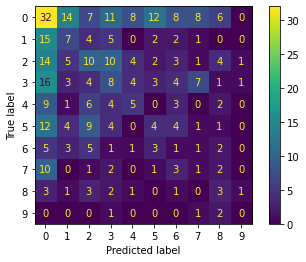

In [18]:
#A confusion matrix  of the predictions of the classifier to see how it performs in detail.
c = confusion_matrix(target_test,predictions)
cm = ConfusionMatrixDisplay(c).plot()


In [19]:
# F1-score measured on test data
f1_score(target_test,predictions,average='macro')

0.13890506737918257

In [20]:
#classification_report
target_names=['(0, 20]constant','(20, 40]constant','(40, 60]constant','(60, 80]constant','(80, 100]constant','(0, 20]intermittent','(20, 40]intermittent','(40, 60]intermittent','(60, 80]intermittent','(80, 100]intermittent',]
print(classification_report(target_test,predictions,digits=3,target_names=target_names,))

                       precision    recall  f1-score   support

      (0, 20]constant      0.276     0.302     0.288       106
     (20, 40]constant      0.184     0.194     0.189        36
     (40, 60]constant      0.204     0.185     0.194        54
     (60, 80]constant      0.167     0.157     0.162        51
    (80, 100]constant      0.217     0.167     0.189        30
  (0, 20]intermittent      0.148     0.103     0.121        39
 (20, 40]intermittent      0.034     0.045     0.039        22
 (40, 60]intermittent      0.048     0.050     0.049        20
 (60, 80]intermittent      0.130     0.200     0.158        15
(80, 100]intermittent      0.000     0.000     0.000         4

             accuracy                          0.188       377
            macro avg      0.141     0.140     0.139       377
         weighted avg      0.189     0.188     0.188       377

